**Nombre del participante:** Bernardo Lozano Wise

**Fecha entrega:** 10-12-2025 (Segundo intento)

**Trayectoria:** Data Scientist Jul 2025 - Flex

**Competencia:** Machine Learning

**Subcompetencia:** Aprendizaje Supervisado

1. Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema. ✅
2. Utilizar el archivo bank-names.txt para obtener información de cada una de las variables. ✅
3. Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado
Solucion_Reto_SC_63_&lt;nombre_y_apellido_del_estudiante&gt;.ipynb. ✅
4. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una
variable llamada “data”. ⬇

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('bank_marketing_RETO_DS_AS.csv')

5. Obtener la información de dicha base de datos que incluya el número de registros, el total
de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en
caso de que existan. ⬇

In [4]:
print("--- Información General del DataFrame ---")
data.info()

print("\n--- Primeras 5 Filas de los Datos ---")
print(data.head())

print("\n--- Estadísticas Descriptivas (Numéricas y Categóricas) ---")
print(data.describe(include='all'))

print("\n--- Conteo de Valores Nulos por Columna ---")
print(data.isnull().sum())

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB

--- Primeras 5 Filas de los Datos ---
   age            jo

### Plan de Preprocesamiento de Variables

*   **`age`** (Numérica - Continua): Estandarizar
*   **`job`** (Categórica - Nominal): One-Hot Encoder
*   **`marital`** (Categórica - Nominal): One-Hot Encode
*   **`education`** (Categórica - Ordinal): Ordinal Encoder
*   **`default`** (Categórica - Binaria): Mapeo Manual (`{'yes': 1, 'no': 0}`)
*   **`balance`** (Numérica - Continua): Estandarizar
*   **`housing`** (Categórica - Binaria): Mapeo Manual (`{'yes': 1, 'no': 0}`)
*   **`loan`** (Categórica - Binaria): Mapeo Manual (`{'yes': 1, 'no': 0}`)
*   **`contact`** (Categórica - Nominal): One-Hot Encoder
*   **`day`** (Numérica - Discreta): Se deja como numérica por ahora
*   **`month`** (Categórica - Ordinal): Ordinal Encoder
*   **`duration`** (Numérica - Continua): Estandarizar
*   **`campaign`** (Numérica - Discreta): Se deja como numérica por ahora
*   **`pdays`** (Numérica - Discreta): Se deja como numérica por ahora
*   **`previous`** (Numérica - Discreta): Se deja como numérica por ahora
*   **`poutcome`** (Categórica - Ordinal): Ordinal Encoder
*   **`y`** (Categórica - Binaria): Mapeo Manual (`{'yes': 1, 'no': 0}`)

6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.
Justifica si utilizas LabelEncoder o OneHotEcoder. ⬇

In [5]:
# Copiamos para no modificar el 'data' original
df_proc = data.copy()

# Transformamos 'y' y la separamos
y = df_proc.pop('y').map({'yes': 1, 'no': 0})
# X es todo lo demás
X = df_proc

# --- Definimos grupos y aplicamos transformaciones a X ---
# (Se mantiene 'duration' como lo pediste)
columnas_nominales = ['job', 'marital', 'contact']
columnas_ordinales = ['education', 'month', 'poutcome']
columnas_binarias = ['default', 'housing', 'loan']
columnas_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Mapeo de binarias
for col in columnas_binarias:
    X[col] = X[col].map({'yes': 1, 'no': 0})

# Encoding de ordinales
education_order = ['unknown', 'primary', 'secondary', 'tertiary']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
poutcome_order = ['unknown', 'failure', 'other', 'success']
ordinal_encoder = OrdinalEncoder(categories=[education_order, month_order, poutcome_order])
X[columnas_ordinales] = ordinal_encoder.fit_transform(X[columnas_ordinales])

# Encoding de nominales con pd.get_dummies
X = pd.get_dummies(X, columns=columnas_nominales, drop_first=True)

# Estandarización de numéricas
scaler = StandardScaler()
X[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

print("--- Preprocesamiento completado. 'X' y 'y' están listos para la partición. ---")
print("Dimensiones de X (procesado):", X.shape)

--- Preprocesamiento completado. 'X' y 'y' están listos para la partición. ---
Dimensiones de X (procesado): (9000, 28)


### Justificación del Proceso de Transformación de Variables

Se diseñó un plan de preprocesamiento a medida para cada tipo de variable. Se identificaron tres subtipos de variables categóricas, y cada uno recibió un tratamiento diferente:

*   **Variables Nominales (job, marital, contact):** Estas variables representan categorías que no tienen un orden o jerarquía intrínseca. Por ejemplo, "management" no es inherentemente "mayor" o "menor" que "technician". `OneHotEncoder` es la técnica correcta aquí porque crea una nueva columna binaria para cada categoría, permitiendo que el modelo trate cada una como una característica independiente sin asumir una relación ordinal falsa.

*   **Variables Ordinales (education, month, poutcome):** A diferencia de las nominales, estas variables tienen un orden lógico claro (ej. primary < secondary < tertiary). OrdinalEncoder fue elegido para mapear estas categorías a valores numéricos secuenciales (ej. 0, 1, 2, 3), preservando así esta valiosa información jerárquica para el modelo.

*   **Variables Binarias (default, housing, loan):** Si bien OneHotEncoder funcionaría, es más eficiente y directo mapear estas variables de "sí/no" a valores de 1 y 0. Esto crea una sola columna numérica en lugar de dos, simplificando el dataset sin pérdida de información.


LabelEncoder no se utilizó porque asignaría un número entero arbitrario a cada categoría (ej. job='management' -> 5, job='technician' -> 10). Un algoritmo de ML interpretaría erróneamente estos números como si tuvieran un orden y una magnitud, aprendiendo una relación falsa (ej. "technician" es el doble de importante que "management"). Esto introduciría un sesgo incorrecto en el modelo. OneHotEncoder evita este problema por completo.

Las variables numéricas se estandarizaron usando StandardScaler. Variables como age y balance operan en escalas muy diferentes. Los algoritmos que dependen de distancias o gradientes (como Regresión Logística, SVM, o la optimización en XGBoost) pueden verse indebidamente influenciados por las variables con magnitudes más grandes. La estandarización transforma todas las variables numéricas para que tengan una media de 0 y una desviación estándar de 1, asegurando que todas contribuyan de manera equitativa al proceso de aprendizaje.

7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo. ⬇

In [6]:
numeric_features = data.select_dtypes(include=np.number).columns.tolist()

skewness = data[numeric_features].skew()
print("\n--- Sesgo de las Variables Numéricas ---")
print(skewness)

skewed_features = skewness[abs(skewness) > 1].index.tolist()
print(f"\nVariables con sesgo significativo: {skewed_features}")


--- Sesgo de las Variables Numéricas ---
age         0.801429
balance     7.280036
day         0.117315
duration    2.184045
campaign    5.392712
pdays       2.349177
previous    7.682286
dtype: float64

Variables con sesgo significativo: ['balance', 'duration', 'campaign', 'pdays', 'previous']


8. Considera la variable “y” como la variable de salida y el resto de las variables como las
variables de entrada. ✅
9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y
20%, respectivamente. ⬇

In [7]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print("--- Partición 60/20/20 completada ---")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_validation.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

--- Partición 60/20/20 completada ---
Tamaño del conjunto de entrenamiento: (5400, 28)
Tamaño del conjunto de validación: (1800, 28)
Tamaño del conjunto de prueba: (1800, 28)


10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo
con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los
parámetros del modelo hasta obtener tu mejor resultado. ⬇

In [8]:
print("--- Entrenando Modelo Base (parámetros por defecto) ---")
log_reg_base = LogisticRegression(random_state=42, max_iter=1000)
log_reg_base.fit(X_train, y_train)
print("Modelo Base entrenado exitosamente.")

print("\n--- Rendimiento del Modelo Base en los datos de ENTRENAMIENTO ---")
y_train_pred_base = log_reg_base.predict(X_train)
acc_train_base = accuracy_score(y_train, y_train_pred_base)
print(f"Accuracy del Modelo Base en el CONJUNTO DE ENTRENAMIENTO: {acc_train_base:.4f}")

--- Entrenando Modelo Base (parámetros por defecto) ---
Modelo Base entrenado exitosamente.

--- Rendimiento del Modelo Base en los datos de ENTRENAMIENTO ---
Accuracy del Modelo Base en el CONJUNTO DE ENTRENAMIENTO: 0.8100


In [9]:
print("--- Evaluando Modelo Base en el Conjunto de Validación ---")
y_val_pred_base = log_reg_base.predict(X_validation)
acc_val_base = accuracy_score(y_validation, y_val_pred_base)
print(f"Accuracy del Modelo Base en Validación: {acc_val_base:.4f}")

--- Evaluando Modelo Base en el Conjunto de Validación ---
Accuracy del Modelo Base en Validación: 0.8061


In [10]:
print("--- Iniciando búsqueda manual de hiperparámetros (optimizando para Accuracy) ---")
C_values = [0.01, 0.1, 1, 10, 100]
class_weight_values = [None, 'balanced']
solvers = ['liblinear', 'lbfgs']

best_score = -1
best_params = {}
best_model = None
results = []

for c in C_values:
    for weight in class_weight_values:
        for solver in solvers:
            model = LogisticRegression(C=c, class_weight=weight, solver=solver, random_state=42, max_iter=2000)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_validation)
            score = accuracy_score(y_validation, y_val_pred)
            results.append({'C': c, 'class_weight': weight, 'solver': solver, 'accuracy_validation': score})
            if score > best_score:
                best_score = score
                best_params = {'C': c, 'class_weight': weight, 'solver': solver}
                best_model = model

print("\n--- Resultados de la Búsqueda ---")
results_df = pd.DataFrame(results).sort_values(by='accuracy_validation', ascending=False)
display(results_df.head())

print(f"\nMejor Accuracy en Validación: {best_score:.4f} (comparado con el baseline de {acc_val_base:.4f})")
print(f"Mejores parámetros encontrados: {best_params}")

--- Iniciando búsqueda manual de hiperparámetros (optimizando para Accuracy) ---

--- Resultados de la Búsqueda ---


,C,class_weight,solver,accuracy_validation
18,100.0,balanced,liblinear,0.811667
19,100.0,balanced,lbfgs,0.810556
11,1.0,balanced,lbfgs,0.810556
15,10.0,balanced,lbfgs,0.810556
14,10.0,balanced,liblinear,0.810556



Mejor Accuracy en Validación: 0.8117 (comparado con el baseline de 0.8061)
Mejores parámetros encontrados: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}


11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las
predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros
del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas
ocultas. ⬇

In [11]:
print("--- Entrenando Modelo Base de Red Neuronal (parámetros por defecto) ---")

nn_base = MLPClassifier(random_state=42, max_iter=1000)

nn_base.fit(X_train, y_train)

print("Modelo Base de Red Neuronal entrenado exitosamente.")

print("\n--- Rendimiento del Modelo Base en los datos de ENTRENAMIENTO ---")
y_train_pred_base_nn = nn_base.predict(X_train)
acc_train_base_nn = accuracy_score(y_train, y_train_pred_base_nn)

print(f"Accuracy del Modelo Base en el CONJUNTO DE ENTRENAMIENTO: {acc_train_base_nn:.4f}")

--- Entrenando Modelo Base de Red Neuronal (parámetros por defecto) ---
Modelo Base de Red Neuronal entrenado exitosamente.

--- Rendimiento del Modelo Base en los datos de ENTRENAMIENTO ---
Accuracy del Modelo Base en el CONJUNTO DE ENTRENAMIENTO: 0.9317


In [12]:
print("--- Evaluando Modelo Base de Red Neuronal en el Conjunto de Validación ---")

y_val_pred_base_nn = nn_base.predict(X_validation)

acc_val_base_nn = accuracy_score(y_validation, y_val_pred_base_nn)
print(f"Accuracy del Modelo Base en Validación: {acc_val_base_nn:.4f}")

--- Evaluando Modelo Base de Red Neuronal en el Conjunto de Validación ---
Accuracy del Modelo Base en Validación: 0.8100


In [13]:
print("--- Iniciando búsqueda manual de hiperparámetros para Red Neuronal ---")

hidden_layer_configs = [
    (50,),
    (100,),
    (50, 25),
    (100, 50)
]

alpha_values = [0.0001, 0.001, 0.01]

best_score_nn = -1
best_params_nn = {}
best_model_nn = None
results_nn = []

for layers in hidden_layer_configs:
    for alpha in alpha_values:
        model = MLPClassifier(hidden_layer_sizes=layers, alpha=alpha, random_state=42, max_iter=1000)
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_validation)
        score = accuracy_score(y_validation, y_val_pred)
        results_nn.append({'hidden_layers': layers, 'alpha': alpha, 'accuracy_validation': score})
        if score > best_score_nn:
            best_score_nn = score
            best_params_nn = {'hidden_layer_sizes': layers, 'alpha': alpha}
            best_model_nn = model

print("\n--- Resultados de la Búsqueda ---")
results_nn_df = pd.DataFrame(results_nn).sort_values(by='accuracy_validation', ascending=False)
display(results_nn_df.head())

print("\n--- Búsqueda completada ---")
print(f"Mejor Accuracy en Validación: {best_score_nn:.4f} (comparado con el baseline de {acc_val_base_nn:.4f})")
print(f"Mejores parámetros encontrados: {best_params_nn}")

--- Iniciando búsqueda manual de hiperparámetros para Red Neuronal ---

--- Resultados de la Búsqueda ---


,hidden_layers,alpha,accuracy_validation
1,"(50,)",0.0010,0.816111
2,"(50,)",0.0100,0.813333
5,"(100,)",0.0100,0.811667
3,"(100,)",0.0001,0.810000
0,"(50,)",0.0001,0.807222



--- Búsqueda completada ---
Mejor Accuracy en Validación: 0.8161 (comparado con el baseline de 0.8100)
Mejores parámetros encontrados: {'hidden_layer_sizes': (50,), 'alpha': 0.001}


12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de
prueba para obtener el desempeño final del modelo y su matriz de confusión. ⬇

Tras realizar un proceso de ajuste de hiperparámetros para los modelos de Regresión Logística y Red Neuronal, se compararon sus mejores desempeños utilizando el conjunto de validación. El objetivo era seleccionar el modelo con el `accuracy` más alto para proceder a la evaluación final.


Los resultados fueron los siguientes:
*   **Mejor Regresión Logística:** Accuracy en Validación = **0.8117**
*   **Mejor Red Neuronal:** Accuracy en Validación = **0.8161**


Dado que el modelo de Red Neuronal (`MLPClassifier`) obtuvo un `accuracy` ligeramente superior en el conjunto de validación, se selecciona como el modelo campeón.


El análisis de ajuste de cada modelo fue fundamental para esta selección. La Regresión Logística mostró signos de **subajuste** (alto sesgo), con scores de entrenamiento (0.8100) y validación (0.8061) muy cercanos pero estancados, sugiriendo que el modelo era demasiado simple para la complejidad del problema. Por el contrario, la Red Neuronal base exhibió un claro **sobreajuste** (alta varianza), con una brecha significativa entre su accuracy de entrenamiento (0.9317) y el de validación (0.8100). El proceso de optimización fue exitoso al mitigar este sobreajuste mediante la regularización (alpha), lo que resultó en un modelo final con un buen equilibrio entre sesgo y varianza, justificando su selección como la solución más robusta y de mejor desempeño.


A continuación, se evaluará el desempeño final de este modelo seleccionado en el **conjunto de prueba**, que contiene datos que el modelo no ha visto en ninguna etapa anterior (ni en el entrenamiento ni en el ajuste de hiperparámetros), para obtener una estimación honesta de su rendimiento en un escenario real.

--- Evaluando el Modelo Campeón (Red Neuronal) en el Conjunto de PRUEBA ---
Hiperparámetros del modelo final: {'hidden_layer_sizes': (50,), 'alpha': 0.001}

Reporte de Clasificación Final (Conjunto de Prueba):
              precision    recall  f1-score   support

 No Suscribe       0.85      0.85      0.85      1043
 Sí Suscribe       0.79      0.79      0.79       757

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.82      0.82      0.82      1800


Matriz de Confusión Final (Conjunto de Prueba):


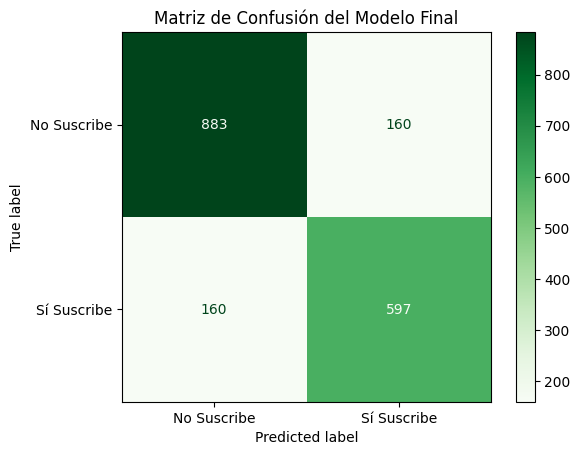

In [18]:
print("--- Evaluando el Modelo Campeón (Red Neuronal) en el Conjunto de PRUEBA ---")
print(f"Hiperparámetros del modelo final: {best_params_nn}")

# Usamos el 'best_model_nn' guardado en la celda anterior para predecir en el conjunto de prueba
y_test_pred_final = best_model_nn.predict(X_test)

# Mostramos el reporte de clasificación final, que es la métrica definitiva de rendimiento
print("\nReporte de Clasificación Final (Conjunto de Prueba):")
print(classification_report(y_test, y_test_pred_final, target_names=['No Suscribe', 'Sí Suscribe']))

# Mostramos la matriz de confusión final
print("\nMatriz de Confusión Final (Conjunto de Prueba):")
ConfusionMatrixDisplay.from_estimator(
    best_model_nn,
    X_test,
    y_test,
    cmap='Greens', # Usamos el color de la Red Neuronal para consistencia
    display_labels=['No Suscribe', 'Sí Suscribe']
)
plt.title("Matriz de Confusión del Modelo Final")
plt.show()

13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de
técnicas de inteligencia artificial en problemas de mercadotecnia? ⬇

Se concluye que la aplicación de técnicas de inteligencia artificial, como los modelos de clasificación desarrollados, representa una ventaja estratégica fundamental en problemas de mercadotecnia. Al ser capaz de predecir con un 82% de accuracy qué clientes son propensos a suscribir un depósito a plazo, el modelo permite a la institución financiera trascender el marketing masivo para adoptar un enfoque de alta precisión. En lugar de contactar a toda la base de datos, los esfuerzos se pueden concentrar en el segmento de clientes con mayor probabilidad de conversión, lo que se traduce directamente en una optimización de recursos, una reducción significativa de los costos operativos y, en última instancia, en un aumento sustancial del retorno de inversión (ROI) de la campaña. Por lo tanto, el Machine Learning se consolida como una herramienta esencial para transformar datos históricos de clientes en estrategias de mercado más inteligentes, eficientes y rentables.

14. Descarga tu script (archivo con extensión .ipynb) y guárdalo siguiendo la nomenclatura que
se te indica en Formato de entrega de actividad. ✅
15. Sube el archivo a GitHub. ✅
16. Copia y pega en un archivo de edición de texto la liga de tu archivo. ✅